## Feature Engineering - Lab 01

In [1]:
import pandas as pd

# Load the CSV file containing the data set
df_train = pd.read_csv('train.csv')
print(f"Shape of the train data set: {df_train.shape}")

df_valid = pd.read_csv('valid.csv')
print(f"Shape of the validation data set: {df_valid.shape}")

df_test = pd.read_csv('X_test.csv')
print(f"Shape of the test data set: {df_test.shape}")

df_train.head()

Shape of the train data set: (517788, 145)
Shape of the validation data set: (172596, 145)
Shape of the test data set: (172596, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_status
0,NaN,NaN,14000,14000,14000.0,36 months,7.35,434.53,A,A4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
1,NaN,NaN,2000,2000,2000.0,36 months,16.29,70.61,D,D2,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
2,NaN,NaN,5000,5000,4750.0,36 months,7.39,155.28,A,A4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
3,NaN,NaN,20600,20600,20600.0,36 months,11.99,684.12,B,B5,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
4,NaN,NaN,10000,10000,10000.0,36 months,7.39,310.56,A,A4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1


In [2]:
# Get a copy of the data set for feature engineering process
df_copy = df_train.copy()

In [3]:
null_counts = df_copy.isnull().sum()
print(null_counts)

id                       517788
member_id                517788
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
                          ...  
settlement_date          498528
settlement_amount        498528
settlement_percentage    498528
settlement_term          498528
loan_status                   0
Length: 145, dtype: int64


In [4]:
# Remove columns with more than 50% missing values
threshold = 0.5
columns_to_drop = df_copy.columns[df_copy.isnull().mean() > threshold].tolist()

df_copy.drop(columns_to_drop, axis=1, inplace=True)

print(df_copy.shape)

df_copy.head()

(517788, 87)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,loan_status
0,14000,14000,14000.0,36 months,7.35,434.53,A,A4,Paralegal,1 year,...,0.0,1.0,67943.0,23659.0,13600.0,48043.0,N,Cash,N,1
1,2000,2000,2000.0,36 months,16.29,70.61,D,D2,NaN,NaN,...,1.0,0.0,9800.0,4168.0,1300.0,0.0,N,Cash,N,1
2,5000,5000,4750.0,36 months,7.39,155.28,A,A4,owner,4 years,...,0.0,0.0,237800.0,20061.0,64200.0,21600.0,N,Cash,N,1
3,20600,20600,20600.0,36 months,11.99,684.12,B,B5,NaN,NaN,...,0.0,0.0,105100.0,12355.0,15300.0,0.0,N,Cash,N,1
4,10000,10000,10000.0,36 months,7.39,310.56,A,A4,Senior UX designer,< 1 year,...,0.0,1.0,135735.0,141874.0,12000.0,123535.0,N,Cash,N,1


In [5]:
# Imput missing values in the columns
for col in df_copy.columns:
    if col == 'loan_status':
        continue
    elif df_copy[col].dtype == 'object':
        mode_value = df_copy[col].mode()[0]
        df_copy[col] = df_copy[col].fillna(mode_value)
    else:
        mean_value = df_copy[col].mean()
        df_copy[col] = df_copy[col].fillna(mean_value)

print(df_copy.shape)
df_copy.head()

(517788, 87)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,loan_status
0,14000,14000,14000.0,36 months,7.35,434.53,A,A4,Paralegal,1 year,...,0.0,1.0,67943.0,23659.0,13600.0,48043.0,N,Cash,N,1
1,2000,2000,2000.0,36 months,16.29,70.61,D,D2,Teacher,10+ years,...,1.0,0.0,9800.0,4168.0,1300.0,0.0,N,Cash,N,1
2,5000,5000,4750.0,36 months,7.39,155.28,A,A4,owner,4 years,...,0.0,0.0,237800.0,20061.0,64200.0,21600.0,N,Cash,N,1
3,20600,20600,20600.0,36 months,11.99,684.12,B,B5,Teacher,10+ years,...,0.0,0.0,105100.0,12355.0,15300.0,0.0,N,Cash,N,1
4,10000,10000,10000.0,36 months,7.39,310.56,A,A4,Senior UX designer,< 1 year,...,0.0,1.0,135735.0,141874.0,12000.0,123535.0,N,Cash,N,1


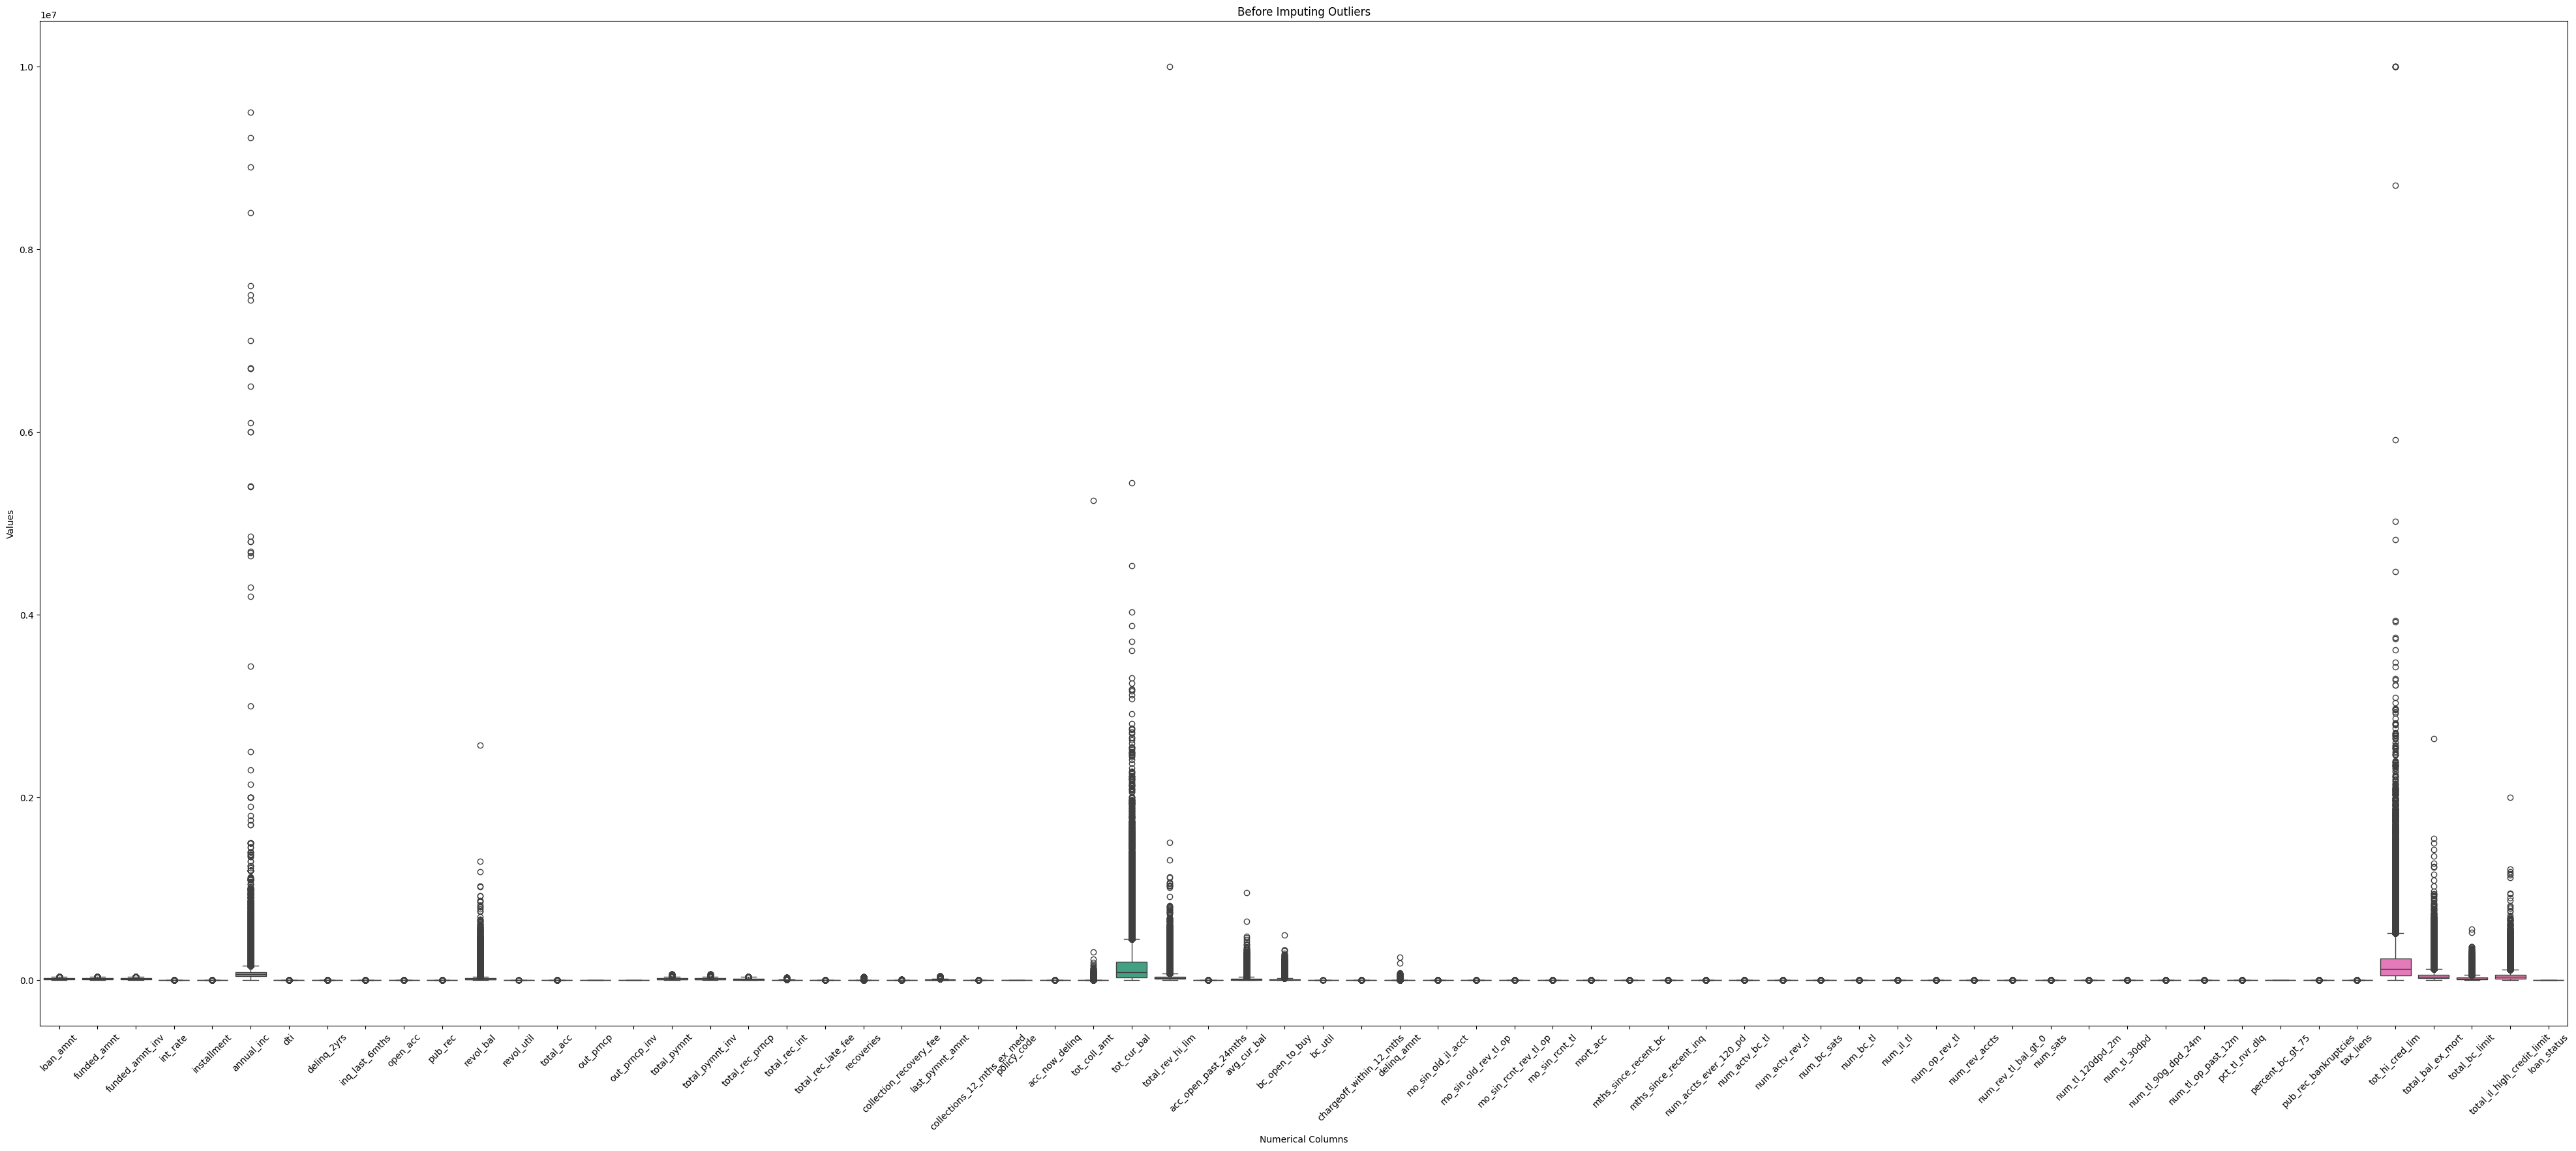

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the numerical columns
numerical_columns = df_copy.select_dtypes(include=np.number).columns

# Create box plots before imputing outliers
plt.figure(figsize=(50, 20))
sns.boxplot(data=df_copy[numerical_columns])
plt.title('Before Imputing Outliers')
plt.xlabel('Numerical Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [7]:
loan_status_counts = df_copy['loan_status'].value_counts()

# Print the counts of ones and zeros
print("Number of ones (1) in 'loan_status':", loan_status_counts.get(1, 0))
print("Number of zeros (0) in 'loan_status':", loan_status_counts.get(0, 0))

Number of ones (1) in 'loan_status': 360795
Number of zeros (0) in 'loan_status': 156993


In [8]:
# Define a function to replace outliers with the median
def replace_outliers(series):
    series_copy = series.copy()  # Create a copy of the input series
    median = series_copy.median()
    std_deviation = series_copy.std()
    outliers = (series_copy - median).abs() > 5 * std_deviation  # Adjust the threshold as needed
    series_copy[outliers] = median
    return series_copy

# Impute outliers in numerical columns
for col in df_copy.select_dtypes(include=np.number).columns:
    df_copy[col] = replace_outliers(df_copy[col])

print(df_copy.shape)
df_copy.head()

(517788, 87)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,loan_status
0,14000,14000,14000.0,36 months,7.35,434.53,A,A4,Paralegal,1 year,...,0.0,1.0,67943.0,23659.0,13600.0,48043.0,N,Cash,N,1
1,2000,2000,2000.0,36 months,16.29,70.61,D,D2,Teacher,10+ years,...,1.0,0.0,9800.0,4168.0,1300.0,0.0,N,Cash,N,1
2,5000,5000,4750.0,36 months,7.39,155.28,A,A4,owner,4 years,...,0.0,0.0,237800.0,20061.0,64200.0,21600.0,N,Cash,N,1
3,20600,20600,20600.0,36 months,11.99,684.12,B,B5,Teacher,10+ years,...,0.0,0.0,105100.0,12355.0,15300.0,0.0,N,Cash,N,1
4,10000,10000,10000.0,36 months,7.39,310.56,A,A4,Senior UX designer,< 1 year,...,0.0,1.0,135735.0,141874.0,12000.0,123535.0,N,Cash,N,1


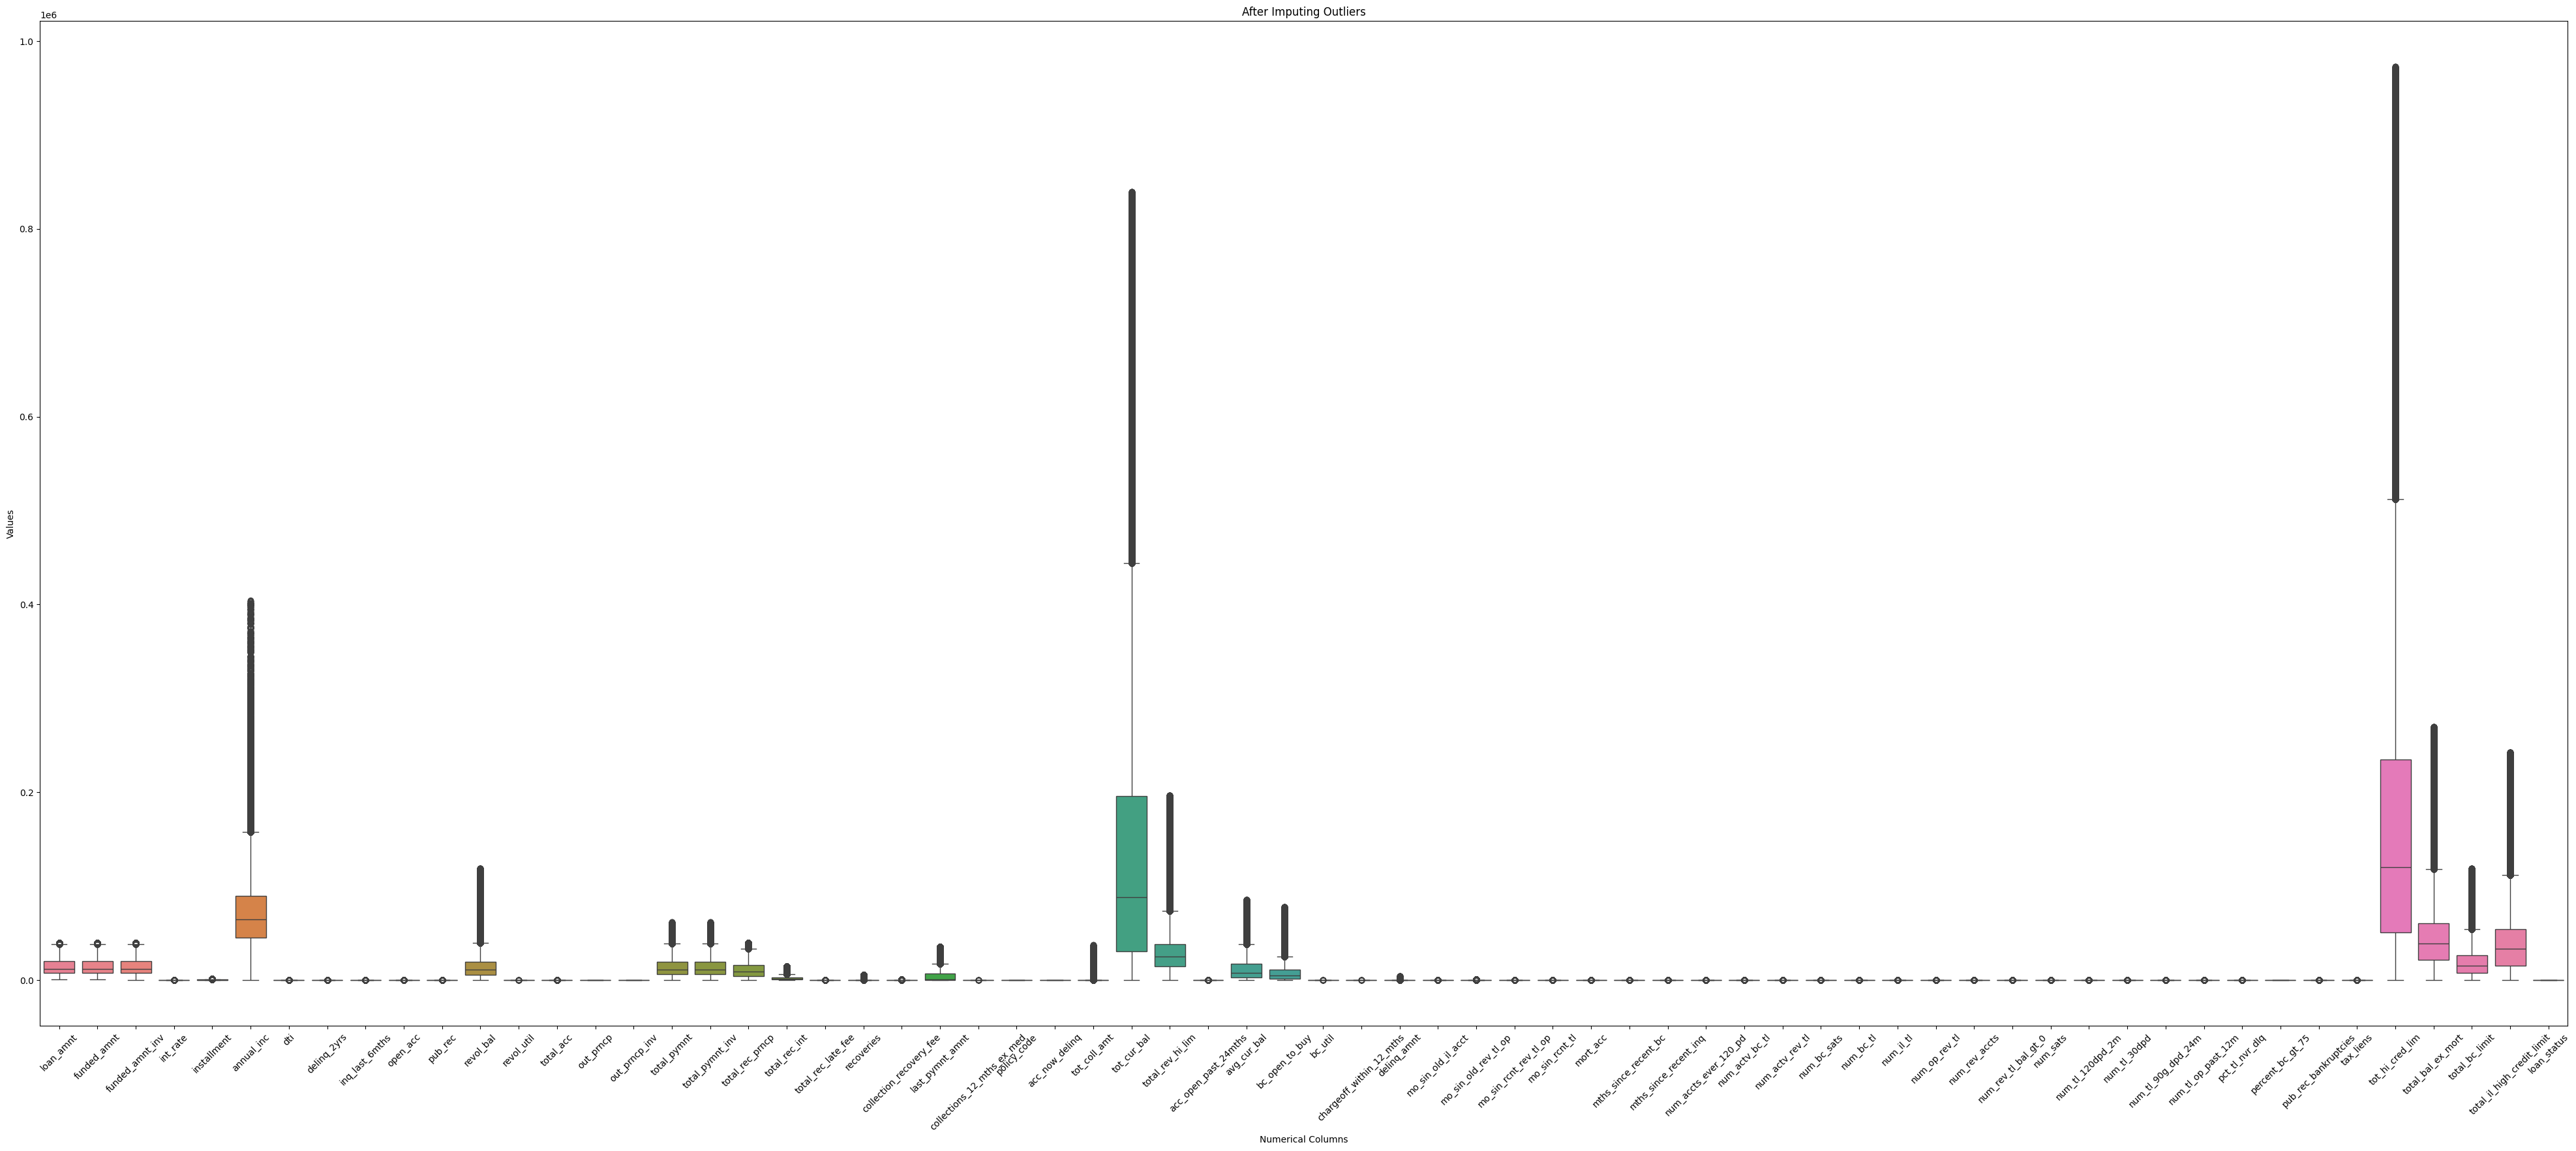

In [9]:
# Create box plots after imputing outliers
plt.figure(figsize=(50, 20))
sns.boxplot(data=df_copy[numerical_columns])
plt.title('After Imputing Outliers')
plt.xlabel('Numerical Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [10]:
# Get the number of unique values in each column
unique_counts = df_copy.nunique()

# Filter columns with only one unique value
constant_columns = unique_counts[unique_counts == 1].index.tolist()

df_copy.drop(constant_columns, axis=1, inplace=True)

print(df_copy.shape)
df_copy.head()

(517788, 81)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,loan_status
0,14000,14000,14000.0,36 months,7.35,434.53,A,A4,Paralegal,1 year,...,0.0,0.0,1.0,67943.0,23659.0,13600.0,48043.0,Cash,N,1
1,2000,2000,2000.0,36 months,16.29,70.61,D,D2,Teacher,10+ years,...,100.0,1.0,0.0,9800.0,4168.0,1300.0,0.0,Cash,N,1
2,5000,5000,4750.0,36 months,7.39,155.28,A,A4,owner,4 years,...,0.0,0.0,0.0,237800.0,20061.0,64200.0,21600.0,Cash,N,1
3,20600,20600,20600.0,36 months,11.99,684.12,B,B5,Teacher,10+ years,...,50.0,0.0,0.0,105100.0,12355.0,15300.0,0.0,Cash,N,1
4,10000,10000,10000.0,36 months,7.39,310.56,A,A4,Senior UX designer,< 1 year,...,25.0,0.0,1.0,135735.0,141874.0,12000.0,123535.0,Cash,N,1


In [11]:
loan_status_counts = df_copy['loan_status'].value_counts()

# Print the counts of ones and zeros
print("Number of ones (1) in 'loan_status':", loan_status_counts.get(1, 0))
print("Number of zeros (0) in 'loan_status':", loan_status_counts.get(0, 0))

Number of ones (1) in 'loan_status': 360795
Number of zeros (0) in 'loan_status': 156993


In [12]:
categorical_cols = df_copy.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'purpose', 'title',
       'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status',
       'last_pymnt_d', 'last_credit_pull_d', 'application_type',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')


In [13]:
# Extract numerical part from 'zip_code' and convert to integers
df_copy['zip_code'] = df_copy['zip_code'].str.extract(r'(\d+)').astype(int)

In [14]:
# Drop column 'grade' because it has correlated values with 'sub_grade'
df_copy.drop('grade', axis=1, inplace=True)

print(df_copy.shape)
df_copy.head()

(517788, 80)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,loan_status
0,14000,14000,14000.0,36 months,7.35,434.53,A4,Paralegal,1 year,MORTGAGE,...,0.0,0.0,1.0,67943.0,23659.0,13600.0,48043.0,Cash,N,1
1,2000,2000,2000.0,36 months,16.29,70.61,D2,Teacher,10+ years,MORTGAGE,...,100.0,1.0,0.0,9800.0,4168.0,1300.0,0.0,Cash,N,1
2,5000,5000,4750.0,36 months,7.39,155.28,A4,owner,4 years,MORTGAGE,...,0.0,0.0,0.0,237800.0,20061.0,64200.0,21600.0,Cash,N,1
3,20600,20600,20600.0,36 months,11.99,684.12,B5,Teacher,10+ years,MORTGAGE,...,50.0,0.0,0.0,105100.0,12355.0,15300.0,0.0,Cash,N,1
4,10000,10000,10000.0,36 months,7.39,310.56,A4,Senior UX designer,< 1 year,MORTGAGE,...,25.0,0.0,1.0,135735.0,141874.0,12000.0,123535.0,Cash,N,1


In [15]:
ordinal_mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

# Encode ordinal categorical values using the mapping dictionary
df_copy['emp_length'] = df_copy['emp_length'].map(ordinal_mapping)

In [16]:
print(f"No. of unique values before get to the lower case: {df_copy['emp_title'].nunique()}")

# Convert values of 'emp_title' column to lowercase
df_copy['emp_title'] = df_copy['emp_title'].str.lower()

print(f"No. of unique values after got to the lower case: {df_copy['emp_title'].nunique()}")

No. of unique values before get to the lower case: 175168
No. of unique values after got to the lower case: 152585


In [17]:
# Classification of categorical columns into ordinal and nominal
ordinal_cols = pd.Index(['term', 'sub_grade', 'verification_status', 'initial_list_status', 'application_type', 'disbursement_method', 'debt_settlement_flag'])
nominal_cols = pd.Index(['emp_title', 'home_ownership', 'purpose', 'title', 'addr_state'])

# Columns with date type values
date_cols = pd.Index(['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'])

In [18]:
# Perform ordinal encoding on ordinal columns
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

df_copy[ordinal_cols] = ordinal_encoder.fit_transform(df_copy[ordinal_cols])

print(df_copy.shape)
df_copy.head()

(517788, 80)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,loan_status
0,14000,14000,14000.0,0.0,7.35,434.53,3.0,paralegal,1,MORTGAGE,...,0.0,0.0,1.0,67943.0,23659.0,13600.0,48043.0,0.0,0.0,1
1,2000,2000,2000.0,0.0,16.29,70.61,16.0,teacher,10,MORTGAGE,...,100.0,1.0,0.0,9800.0,4168.0,1300.0,0.0,0.0,0.0,1
2,5000,5000,4750.0,0.0,7.39,155.28,3.0,owner,4,MORTGAGE,...,0.0,0.0,0.0,237800.0,20061.0,64200.0,21600.0,0.0,0.0,1
3,20600,20600,20600.0,0.0,11.99,684.12,9.0,teacher,10,MORTGAGE,...,50.0,0.0,0.0,105100.0,12355.0,15300.0,0.0,0.0,0.0,1
4,10000,10000,10000.0,0.0,7.39,310.56,3.0,senior ux designer,0,MORTGAGE,...,25.0,0.0,1.0,135735.0,141874.0,12000.0,123535.0,0.0,0.0,1


In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in nominal_cols:
    df_copy[col] = label_encoder.fit_transform(df_copy[col])

print(df_copy.shape)
df_copy.head()

(517788, 80)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,loan_status
0,14000,14000,14000.0,0.0,7.35,434.53,3.0,96770,1,1,...,0.0,0.0,1.0,67943.0,23659.0,13600.0,48043.0,0.0,0.0,1
1,2000,2000,2000.0,0.0,16.29,70.61,16.0,136825,10,1,...,100.0,1.0,0.0,9800.0,4168.0,1300.0,0.0,0.0,0.0,1
2,5000,5000,4750.0,0.0,7.39,155.28,3.0,95544,4,1,...,0.0,0.0,0.0,237800.0,20061.0,64200.0,21600.0,0.0,0.0,1
3,20600,20600,20600.0,0.0,11.99,684.12,9.0,136825,10,1,...,50.0,0.0,0.0,105100.0,12355.0,15300.0,0.0,0.0,0.0,1
4,10000,10000,10000.0,0.0,7.39,310.56,3.0,122083,0,1,...,25.0,0.0,1.0,135735.0,141874.0,12000.0,123535.0,0.0,0.0,1


In [20]:
# Set timestamps for date columns
for col in date_cols:
    df_copy[col] = pd.to_datetime(df_copy[col])
    min_date = df_copy[col].min()
    df_copy[col] = (df_copy[col] - min_date).dt.days.astype(int)

C:\Users\Deshitha\AppData\Local\Temp\ipykernel_3164\902679797.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_copy[col] = pd.to_datetime(df_copy[col])
C:\Users\Deshitha\AppData\Local\Temp\ipykernel_3164\902679797.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_copy[col] = pd.to_datetime(df_copy[col])
C:\Users\Deshitha\AppData\Local\Temp\ipykernel_3164\902679797.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_copy[col] = pd.to_datetime(df_copy[col])
C:\Users\Deshitha\AppData\Local\Temp\ipykernel_3164\902679797.py:3: UserWarning: Could not infer format, s

In [21]:
# get csv output
df_copy.to_csv('Mid.csv', index=False)

In [22]:
df_copy.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,loan_status
0,14000,14000,14000.0,0.0,7.35,434.53,3.0,96770,1,1,...,0.0,0.0,1.0,67943.0,23659.0,13600.0,48043.0,0.0,0.0,1
1,2000,2000,2000.0,0.0,16.29,70.61,16.0,136825,10,1,...,100.0,1.0,0.0,9800.0,4168.0,1300.0,0.0,0.0,0.0,1
2,5000,5000,4750.0,0.0,7.39,155.28,3.0,95544,4,1,...,0.0,0.0,0.0,237800.0,20061.0,64200.0,21600.0,0.0,0.0,1
3,20600,20600,20600.0,0.0,11.99,684.12,9.0,136825,10,1,...,50.0,0.0,0.0,105100.0,12355.0,15300.0,0.0,0.0,0.0,1
4,10000,10000,10000.0,0.0,7.39,310.56,3.0,122083,0,1,...,25.0,0.0,1.0,135735.0,141874.0,12000.0,123535.0,0.0,0.0,1


In [23]:
from sklearn.feature_selection import mutual_info_classif

X_copy = df_copy.drop(columns=['loan_status']) # Features
y_copy = df_copy['loan_status'] # Target Variable

# Compute mutual information for each feature
mi_values = mutual_info_classif(X_copy, y_copy, discrete_features='auto', random_state=42)

# Create a DataFrame to store feature names and their corresponding MI values
mi_df = pd.DataFrame({'Feature': X_copy.columns, 'MI Value': mi_values})
mi_df = mi_df.sort_values(by='MI Value', ascending=False) # Descending order

print(mi_df)

                     Feature  MI Value
29           total_rec_prncp  0.595137
35           last_pymnt_amnt  0.386434
32                recoveries  0.301991
33   collection_recovery_fee  0.282530
27               total_pymnt  0.119771
..                       ...       ...
23                 revol_bal  0.000437
38          application_type  0.000349
46  chargeoff_within_12_mths  0.000222
47               delinq_amnt  0.000000
77       disbursement_method  0.000000

[79 rows x 2 columns]


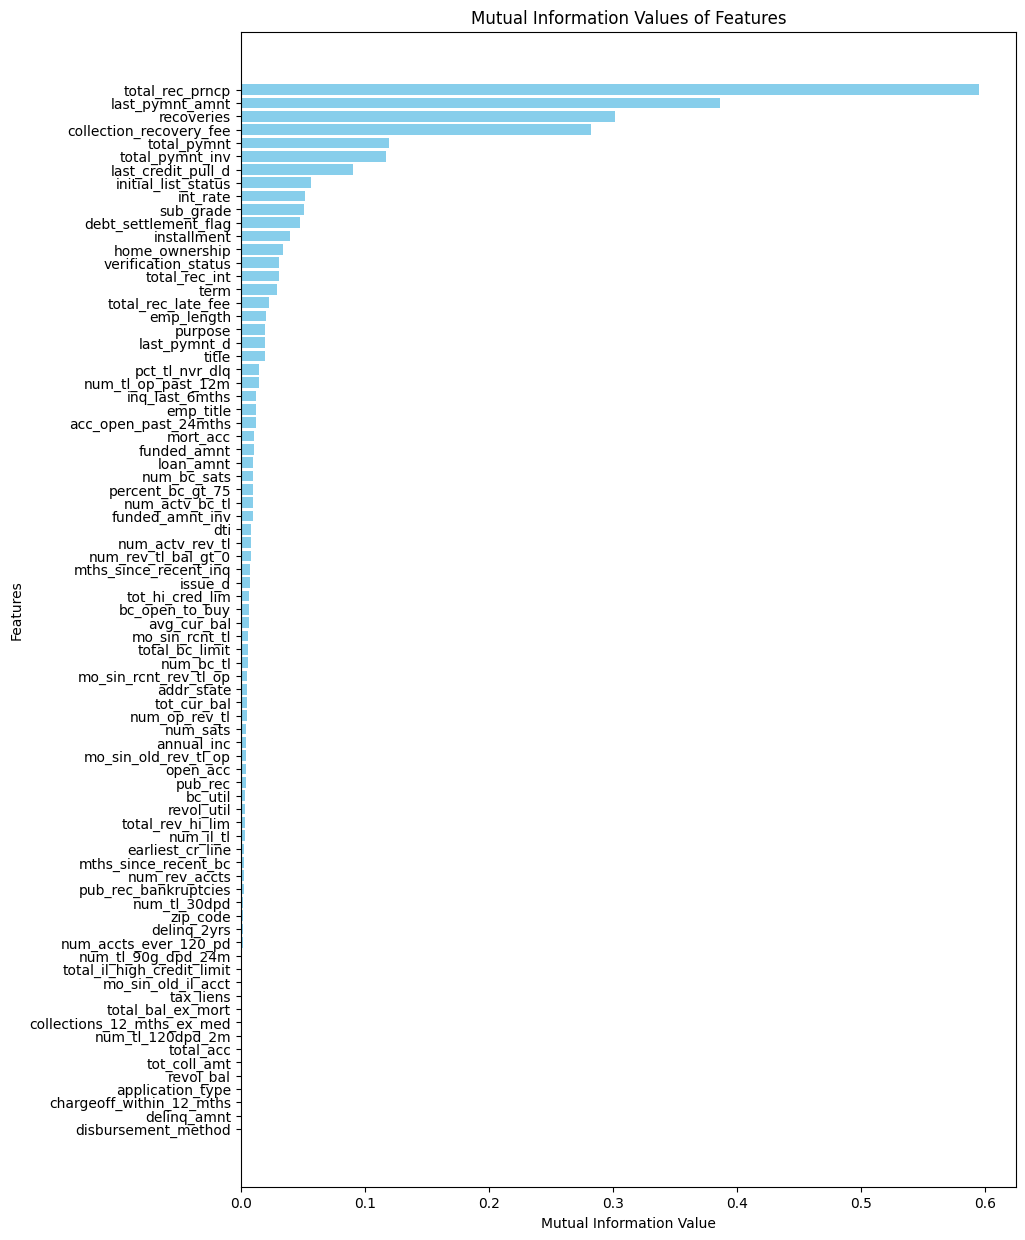

In [24]:
import matplotlib.pyplot as plt

# Plotting the graph
plt.figure(figsize=(10, 15))
plt.barh(mi_df['Feature'], mi_df['MI Value'], color='skyblue')
plt.xlabel('Mutual Information Value')
plt.ylabel('Features')
plt.title('Mutual Information Values of Features')
plt.gca().invert_yaxis()  # Invert y-axis to show feature with highest MI at the top
plt.show()

In [145]:
threshold_value = 0.01
selected_features = mi_df[mi_df['MI Value'] > threshold_value]['Feature'].tolist()

# Print the names of selected features
print("Selected Features with MI > 0.01:")
print(f"No. of selected features: {len(selected_features)}")
print(selected_features)

Selected Features with MI > 0.01:
No. of selected features: 28
['total_rec_prncp', 'last_pymnt_amnt', 'recoveries', 'collection_recovery_fee', 'total_pymnt', 'total_pymnt_inv', 'last_credit_pull_d', 'initial_list_status', 'int_rate', 'sub_grade', 'debt_settlement_flag', 'installment', 'home_ownership', 'verification_status', 'total_rec_int', 'term', 'total_rec_late_fee', 'emp_length', 'purpose', 'last_pymnt_d', 'title', 'pct_tl_nvr_dlq', 'num_tl_op_past_12m', 'inq_last_6mths', 'emp_title', 'acc_open_past_24mths', 'mort_acc', 'funded_amnt']


In [146]:
# Filter the test data set with the selected features
filtered_df_test = df_test[selected_features]

# Adding the target variable to the list of selected features
selected_features.append('loan_status')
filtered_df_train = df_train[selected_features]
filtered_df_valid = df_valid[selected_features]

print(filtered_df_train.shape)
filtered_df_train.head()

(517788, 29)


,total_rec_prncp,last_pymnt_amnt,recoveries,collection_recovery_fee,total_pymnt,total_pymnt_inv,last_credit_pull_d,initial_list_status,int_rate,sub_grade,...,last_pymnt_d,title,pct_tl_nvr_dlq,num_tl_op_past_12m,inq_last_6mths,emp_title,acc_open_past_24mths,mort_acc,funded_amnt,loan_status
0,14000.0,8611.87,0.0,0.0,15118.387808,15118.39,Dec-2018,f,7.35,A4,...,Dec-2018,Debt consolidation,100.0,1.0,0.0,Paralegal,2.0,0.0,14000,1
1,2000.0,70.18,0.0,0.0,2541.534174,2541.53,Jul-2017,w,16.29,D2,...,Jul-2017,Debt consolidation,93.7,4.0,0.0,NaN,6.0,0.0,2000,1
2,5000.0,2662.94,0.0,0.0,5455.927032,5183.13,Oct-2017,f,7.39,A4,...,Oct-2017,Credit card refinancing,100.0,2.0,0.0,owner,3.0,4.0,5000,1
3,20600.0,683.96,0.0,0.0,24600.724807,24600.72,Dec-2017,f,11.99,B5,...,Jan-2018,Debt consolidation,91.2,0.0,0.0,NaN,1.0,2.0,20600,1
4,10000.0,4753.53,0.0,0.0,10952.605895,10952.61,Jul-2018,w,7.39,A4,...,Dec-2017,Credit card refinancing,97.0,1.0,0.0,Senior UX designer,1.0,0.0,10000,1


In [147]:
threshold = 0.5
columns_to_drop = filtered_df_train.columns[filtered_df_train.isnull().mean() > threshold].tolist()
print(columns_to_drop)

[]


In [148]:
# Imput missing values in the columns
for col in filtered_df_train.columns:
    if col == 'loan_status':
        continue
    elif filtered_df_train[col].dtype == 'object':
        mode_value = filtered_df_train[col].mode()[0]
        filtered_df_train.loc[:, col] = filtered_df_train[col].fillna(mode_value)
        filtered_df_valid.loc[:, col] = filtered_df_valid[col].fillna(mode_value)
        filtered_df_test.loc[:, col] = filtered_df_test[col].fillna(mode_value)
    else:
        mean_value = filtered_df_train[col].mean()
        filtered_df_train.loc[:, col] = filtered_df_train[col].fillna(mean_value)
        filtered_df_valid.loc[:, col] = filtered_df_valid[col].fillna(mean_value)
        filtered_df_test.loc[:, col] = filtered_df_test[col].fillna(mean_value)

print(filtered_df_train.shape)
filtered_df_train.head()

(517788, 29)


,total_rec_prncp,last_pymnt_amnt,recoveries,collection_recovery_fee,total_pymnt,total_pymnt_inv,last_credit_pull_d,initial_list_status,int_rate,sub_grade,...,last_pymnt_d,title,pct_tl_nvr_dlq,num_tl_op_past_12m,inq_last_6mths,emp_title,acc_open_past_24mths,mort_acc,funded_amnt,loan_status
0,14000.0,8611.87,0.0,0.0,15118.387808,15118.39,Dec-2018,f,7.35,A4,...,Dec-2018,Debt consolidation,100.0,1.0,0.0,Paralegal,2.0,0.0,14000,1
1,2000.0,70.18,0.0,0.0,2541.534174,2541.53,Jul-2017,w,16.29,D2,...,Jul-2017,Debt consolidation,93.7,4.0,0.0,Teacher,6.0,0.0,2000,1
2,5000.0,2662.94,0.0,0.0,5455.927032,5183.13,Oct-2017,f,7.39,A4,...,Oct-2017,Credit card refinancing,100.0,2.0,0.0,owner,3.0,4.0,5000,1
3,20600.0,683.96,0.0,0.0,24600.724807,24600.72,Dec-2017,f,11.99,B5,...,Jan-2018,Debt consolidation,91.2,0.0,0.0,Teacher,1.0,2.0,20600,1
4,10000.0,4753.53,0.0,0.0,10952.605895,10952.61,Jul-2018,w,7.39,A4,...,Dec-2017,Credit card refinancing,97.0,1.0,0.0,Senior UX designer,1.0,0.0,10000,1


In [149]:
# No. of missing values in each column of the filtered data set
print(filtered_df_train.isnull().sum())

total_rec_prncp            0
last_pymnt_amnt            0
recoveries                 0
collection_recovery_fee    0
total_pymnt                0
total_pymnt_inv            0
last_credit_pull_d         0
initial_list_status        0
int_rate                   0
sub_grade                  0
debt_settlement_flag       0
installment                0
home_ownership             0
verification_status        0
total_rec_int              0
term                       0
total_rec_late_fee         0
emp_length                 0
purpose                    0
last_pymnt_d               0
title                      0
pct_tl_nvr_dlq             0
num_tl_op_past_12m         0
inq_last_6mths             0
emp_title                  0
acc_open_past_24mths       0
mort_acc                   0
funded_amnt                0
loan_status                0
dtype: int64


In [150]:
# Impute outliers in numerical columns
for col in filtered_df_train.select_dtypes(include=np.number).columns:
    if col == 'loan_status':
        continue
    filtered_df_train.loc[:, col] = replace_outliers(filtered_df_train[col])
    filtered_df_valid.loc[:, col] = replace_outliers(filtered_df_valid[col])
    filtered_df_test.loc[:, col] = replace_outliers(filtered_df_test[col])

print(filtered_df_train.shape)
filtered_df_train.head()

(517788, 29)


,total_rec_prncp,last_pymnt_amnt,recoveries,collection_recovery_fee,total_pymnt,total_pymnt_inv,last_credit_pull_d,initial_list_status,int_rate,sub_grade,...,last_pymnt_d,title,pct_tl_nvr_dlq,num_tl_op_past_12m,inq_last_6mths,emp_title,acc_open_past_24mths,mort_acc,funded_amnt,loan_status
0,14000.0,8611.87,0.0,0.0,15118.387808,15118.39,Dec-2018,f,7.35,A4,...,Dec-2018,Debt consolidation,100.0,1.0,0.0,Paralegal,2.0,0.0,14000,1
1,2000.0,70.18,0.0,0.0,2541.534174,2541.53,Jul-2017,w,16.29,D2,...,Jul-2017,Debt consolidation,93.7,4.0,0.0,Teacher,6.0,0.0,2000,1
2,5000.0,2662.94,0.0,0.0,5455.927032,5183.13,Oct-2017,f,7.39,A4,...,Oct-2017,Credit card refinancing,100.0,2.0,0.0,owner,3.0,4.0,5000,1
3,20600.0,683.96,0.0,0.0,24600.724807,24600.72,Dec-2017,f,11.99,B5,...,Jan-2018,Debt consolidation,91.2,0.0,0.0,Teacher,1.0,2.0,20600,1
4,10000.0,4753.53,0.0,0.0,10952.605895,10952.61,Jul-2018,w,7.39,A4,...,Dec-2017,Credit card refinancing,97.0,1.0,0.0,Senior UX designer,1.0,0.0,10000,1


In [151]:
# Categorical columns in the filtered data set
categorical_cols = filtered_df_train.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['last_credit_pull_d', 'initial_list_status', 'sub_grade',
       'debt_settlement_flag', 'home_ownership', 'verification_status', 'term',
       'emp_length', 'purpose', 'last_pymnt_d', 'title', 'emp_title'],
      dtype='object')


In [152]:
print(f"No. of unique values before get to the lower case: {filtered_df_train['emp_title'].nunique()}")

# Convert values of 'emp_title' column to lowercase
filtered_df_train.loc[:, 'emp_title'] = filtered_df_train['emp_title'].str.lower()
filtered_df_valid.loc[:, 'emp_title'] = filtered_df_valid['emp_title'].str.lower()
filtered_df_test.loc[:, 'emp_title'] = filtered_df_test['emp_title'].str.lower()

print(f"No. of unique values after got to the lower case: {filtered_df_train['emp_title'].nunique()}")

No. of unique values before get to the lower case: 175168
No. of unique values after got to the lower case: 152585


In [153]:
ordinal_cols = pd.Index(['term', 'sub_grade', 'verification_status', 'initial_list_status', 'debt_settlement_flag'])
nominal_cols = pd.Index(['emp_title', 'home_ownership', 'purpose', 'title'])

# Columns with date type values
date_cols = pd.Index(['last_pymnt_d', 'last_credit_pull_d'])

In [169]:
ordinal_mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

# Encode ordinal categorical values using the mapping dictionary
filtered_df_train['emp_length'] = filtered_df_train['emp_length'].map(ordinal_mapping)
filtered_df_valid['emp_length'] = filtered_df_valid['emp_length'].map(ordinal_mapping)
filtered_df_test['emp_length'] = filtered_df_test['emp_length'].map(ordinal_mapping)

C:\Users\Deshitha\AppData\Local\Temp\ipykernel_3164\2341889227.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_train['emp_length'] = filtered_df_train['emp_length'].map(ordinal_mapping)
C:\Users\Deshitha\AppData\Local\Temp\ipykernel_3164\2341889227.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_valid['emp_length'] = filtered_df_valid['emp_length'].map(ordinal_mapping)
C:\Users\Deshitha\AppData\Local\Temp\ipykernel_3164\2341889227.py:18: SettingWithCopyWarning: 
A value is 

In [155]:
# Ordinal encoding for ordinal columns
for col in ordinal_cols:
    filtered_df_train[col] = ordinal_encoder.fit_transform(filtered_df_train[[col]])
    filtered_df_valid[col] = ordinal_encoder.transform(filtered_df_valid[[col]])
    filtered_df_test[col] = ordinal_encoder.transform(filtered_df_test[[col]])

print(filtered_df_train.shape)
filtered_df_train.head()

C:\Users\Deshitha\AppData\Local\Temp\ipykernel_3164\4244386993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_train[col] = ordinal_encoder.fit_transform(filtered_df_train[[col]])
C:\Users\Deshitha\AppData\Local\Temp\ipykernel_3164\4244386993.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_valid[col] = ordinal_encoder.transform(filtered_df_valid[[col]])
C:\Users\Deshitha\AppData\Local\Temp\ipykernel_3164\4244386993.py:5: SettingWithCopyWarning: 
A value is trying to be set on

(517788, 29)


C:\Users\Deshitha\AppData\Local\Temp\ipykernel_3164\4244386993.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_valid[col] = ordinal_encoder.transform(filtered_df_valid[[col]])
C:\Users\Deshitha\AppData\Local\Temp\ipykernel_3164\4244386993.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_test[col] = ordinal_encoder.transform(filtered_df_test[[col]])


,total_rec_prncp,last_pymnt_amnt,recoveries,collection_recovery_fee,total_pymnt,total_pymnt_inv,last_credit_pull_d,initial_list_status,int_rate,sub_grade,...,last_pymnt_d,title,pct_tl_nvr_dlq,num_tl_op_past_12m,inq_last_6mths,emp_title,acc_open_past_24mths,mort_acc,funded_amnt,loan_status
0,14000.0,8611.87,0.0,0.0,15118.387808,15118.39,Dec-2018,0.0,7.35,3.0,...,Dec-2018,Debt consolidation,100.0,1.0,0.0,paralegal,2.0,0.0,14000,1
1,2000.0,70.18,0.0,0.0,2541.534174,2541.53,Jul-2017,1.0,16.29,16.0,...,Jul-2017,Debt consolidation,93.7,4.0,0.0,teacher,6.0,0.0,2000,1
2,5000.0,2662.94,0.0,0.0,5455.927032,5183.13,Oct-2017,0.0,7.39,3.0,...,Oct-2017,Credit card refinancing,100.0,2.0,0.0,owner,3.0,4.0,5000,1
3,20600.0,683.96,0.0,0.0,24600.724807,24600.72,Dec-2017,0.0,11.99,9.0,...,Jan-2018,Debt consolidation,91.2,0.0,0.0,teacher,1.0,2.0,20600,1
4,10000.0,4753.53,0.0,0.0,10952.605895,10952.61,Jul-2018,1.0,7.39,3.0,...,Dec-2017,Credit card refinancing,97.0,1.0,0.0,senior ux designer,1.0,0.0,10000,1


In [121]:
filtered_df_train.head()

,total_rec_prncp,last_pymnt_amnt,recoveries,collection_recovery_fee,total_pymnt,total_pymnt_inv,last_credit_pull_d,initial_list_status,int_rate,sub_grade,...,last_pymnt_d,title,pct_tl_nvr_dlq,num_tl_op_past_12m,inq_last_6mths,emp_title,acc_open_past_24mths,mort_acc,funded_amnt,loan_status
0,14000.0,8611.87,0.0,0.0,15118.387808,15118.39,Dec-2018,0.0,7.35,3.0,...,Dec-2018,Debt consolidation,100.0,1.0,0.0,paralegal,2.0,0.0,14000,1
1,2000.0,70.18,0.0,0.0,2541.534174,2541.53,Jul-2017,1.0,16.29,16.0,...,Jul-2017,Debt consolidation,93.7,4.0,0.0,teacher,6.0,0.0,2000,1
2,5000.0,2662.94,0.0,0.0,5455.927032,5183.13,Oct-2017,0.0,7.39,3.0,...,Oct-2017,Credit card refinancing,100.0,2.0,0.0,owner,3.0,4.0,5000,1
3,20600.0,683.96,0.0,0.0,24600.724807,24600.72,Dec-2017,0.0,11.99,9.0,...,Jan-2018,Debt consolidation,91.2,0.0,0.0,teacher,1.0,2.0,20600,1
4,10000.0,4753.53,0.0,0.0,10952.605895,10952.61,Jul-2018,1.0,7.39,3.0,...,Dec-2017,Credit card refinancing,97.0,1.0,0.0,senior ux designer,1.0,0.0,10000,1


In [157]:
nominal_cols = pd.Index(['home_ownership', 'purpose'])

for col in nominal_cols:
    mode_value = filtered_df_train[col].mode()[0]
    label_encoder.fit(filtered_df_train[col])

    filtered_df_train[col] = label_encoder.transform(filtered_df_train[col])
    filtered_df_valid[col] = label_encoder.transform(filtered_df_valid[col])
    filtered_df_test[col] = label_encoder.transform(filtered_df_test[col])

    # # Transform validation set, handling unseen labels
    # filtered_df_valid[col] = filtered_df_valid[col].map(lambda x: label_encoder.transform([x])[0] if x in label_encoder.classes_ else np.nan)
    
    # # Transform test set, handling unseen labels
    # filtered_df_test[col] = filtered_df_test[col].map(lambda x: label_encoder.transform([x])[0] if x in label_encoder.classes_ else np.nan)

print(filtered_df_train.shape)
filtered_df_train.head()

(517788, 29)


C:\Users\Deshitha\AppData\Local\Temp\ipykernel_3164\802216186.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_train[col] = label_encoder.transform(filtered_df_train[col])
C:\Users\Deshitha\AppData\Local\Temp\ipykernel_3164\802216186.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_valid[col] = label_encoder.transform(filtered_df_valid[col])
C:\Users\Deshitha\AppData\Local\Temp\ipykernel_3164\802216186.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

,total_rec_prncp,last_pymnt_amnt,recoveries,collection_recovery_fee,total_pymnt,total_pymnt_inv,last_credit_pull_d,initial_list_status,int_rate,sub_grade,...,last_pymnt_d,title,pct_tl_nvr_dlq,num_tl_op_past_12m,inq_last_6mths,emp_title,acc_open_past_24mths,mort_acc,funded_amnt,loan_status
0,14000.0,8611.87,0.0,0.0,15118.387808,15118.39,Dec-2018,0.0,7.35,3.0,...,Dec-2018,Debt consolidation,100.0,1.0,0.0,paralegal,2.0,0.0,14000,1
1,2000.0,70.18,0.0,0.0,2541.534174,2541.53,Jul-2017,1.0,16.29,16.0,...,Jul-2017,Debt consolidation,93.7,4.0,0.0,teacher,6.0,0.0,2000,1
2,5000.0,2662.94,0.0,0.0,5455.927032,5183.13,Oct-2017,0.0,7.39,3.0,...,Oct-2017,Credit card refinancing,100.0,2.0,0.0,owner,3.0,4.0,5000,1
3,20600.0,683.96,0.0,0.0,24600.724807,24600.72,Dec-2017,0.0,11.99,9.0,...,Jan-2018,Debt consolidation,91.2,0.0,0.0,teacher,1.0,2.0,20600,1
4,10000.0,4753.53,0.0,0.0,10952.605895,10952.61,Jul-2018,1.0,7.39,3.0,...,Dec-2017,Credit card refinancing,97.0,1.0,0.0,senior ux designer,1.0,0.0,10000,1


In [158]:
nominal_cols = pd.Index(['emp_title', 'title'])

for col in nominal_cols:
    mode_value = filtered_df_train[col].mode()[0]

    filtered_df_train[col] = label_encoder.fit_transform(filtered_df_train[col])
    filtered_df_valid[col] = label_encoder.fit_transform(filtered_df_valid[col])
    filtered_df_test[col] = label_encoder.fit_transform(filtered_df_test[col])

print(filtered_df_train.shape)
filtered_df_train.head()

C:\Users\Deshitha\AppData\Local\Temp\ipykernel_3164\1910187925.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_train[col] = label_encoder.fit_transform(filtered_df_train[col])
C:\Users\Deshitha\AppData\Local\Temp\ipykernel_3164\1910187925.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_valid[col] = label_encoder.fit_transform(filtered_df_valid[col])
C:\Users\Deshitha\AppData\Local\Temp\ipykernel_3164\1910187925.py:8: SettingWithCopyWarning: 
A value is trying to be set on a c

(517788, 29)


,total_rec_prncp,last_pymnt_amnt,recoveries,collection_recovery_fee,total_pymnt,total_pymnt_inv,last_credit_pull_d,initial_list_status,int_rate,sub_grade,...,last_pymnt_d,title,pct_tl_nvr_dlq,num_tl_op_past_12m,inq_last_6mths,emp_title,acc_open_past_24mths,mort_acc,funded_amnt,loan_status
0,14000.0,8611.87,0.0,0.0,15118.387808,15118.39,Dec-2018,0.0,7.35,3.0,...,Dec-2018,7304,100.0,1.0,0.0,96770,2.0,0.0,14000,1
1,2000.0,70.18,0.0,0.0,2541.534174,2541.53,Jul-2017,1.0,16.29,16.0,...,Jul-2017,7304,93.7,4.0,0.0,136825,6.0,0.0,2000,1
2,5000.0,2662.94,0.0,0.0,5455.927032,5183.13,Oct-2017,0.0,7.39,3.0,...,Oct-2017,5653,100.0,2.0,0.0,95544,3.0,4.0,5000,1
3,20600.0,683.96,0.0,0.0,24600.724807,24600.72,Dec-2017,0.0,11.99,9.0,...,Jan-2018,7304,91.2,0.0,0.0,136825,1.0,2.0,20600,1
4,10000.0,4753.53,0.0,0.0,10952.605895,10952.61,Jul-2018,1.0,7.39,3.0,...,Dec-2017,5653,97.0,1.0,0.0,122083,1.0,0.0,10000,1


In [159]:
# Set timestamps for date columns
for col in date_cols:
    filtered_df_train[col] = pd.to_datetime(filtered_df_train[col])
    filtered_df_valid[col] = pd.to_datetime(filtered_df_valid[col])
    filtered_df_test[col] = pd.to_datetime(filtered_df_test[col])

    min_date = filtered_df_train[col].min()
    
    filtered_df_train[col] = (filtered_df_train[col] - min_date).dt.days.astype(int)
    filtered_df_valid[col] = (filtered_df_valid[col] - min_date).dt.days.astype(int)
    filtered_df_test[col] = (filtered_df_test[col] - min_date).dt.days.astype(int)

filtered_df_train.head()

C:\Users\Deshitha\AppData\Local\Temp\ipykernel_3164\3964414351.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  filtered_df_train[col] = pd.to_datetime(filtered_df_train[col])
C:\Users\Deshitha\AppData\Local\Temp\ipykernel_3164\3964414351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_train[col] = pd.to_datetime(filtered_df_train[col])
C:\Users\Deshitha\AppData\Local\Temp\ipykernel_3164\3964414351.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fil

,total_rec_prncp,last_pymnt_amnt,recoveries,collection_recovery_fee,total_pymnt,total_pymnt_inv,last_credit_pull_d,initial_list_status,int_rate,sub_grade,...,last_pymnt_d,title,pct_tl_nvr_dlq,num_tl_op_past_12m,inq_last_6mths,emp_title,acc_open_past_24mths,mort_acc,funded_amnt,loan_status
0,14000.0,8611.87,0.0,0.0,15118.387808,15118.39,4232,0.0,7.35,3.0,...,3987,7304,100.0,1.0,0.0,96770,2.0,0.0,14000,1
1,2000.0,70.18,0.0,0.0,2541.534174,2541.53,3714,1.0,16.29,16.0,...,3469,7304,93.7,4.0,0.0,136825,6.0,0.0,2000,1
2,5000.0,2662.94,0.0,0.0,5455.927032,5183.13,3806,0.0,7.39,3.0,...,3561,5653,100.0,2.0,0.0,95544,3.0,4.0,5000,1
3,20600.0,683.96,0.0,0.0,24600.724807,24600.72,3867,0.0,11.99,9.0,...,3653,7304,91.2,0.0,0.0,136825,1.0,2.0,20600,1
4,10000.0,4753.53,0.0,0.0,10952.605895,10952.61,4079,1.0,7.39,3.0,...,3622,5653,97.0,1.0,0.0,122083,1.0,0.0,10000,1


In [171]:
filtered_df_train.to_csv('Mid.csv', index=False)

In [172]:
# Split the Dataset into Features (X) and Target Variable (y)

X_train = filtered_df_train.drop(columns=['loan_status']) # Features
y_train = filtered_df_train['loan_status'] # Target Variable

X_val = filtered_df_valid.drop(columns=['loan_status']) # Features
y_val = filtered_df_valid['loan_status'] # Target Variable

In [173]:
from xgboost import XGBClassifier

# Train a model with the XGBoost Classifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [181]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'learning_rate': [0.3, 0.4, 0.5, 0.6],
    'max_depth': [2, 3, 4, 5],
    'n_estimators': [100, 200, 300, 400],
}

xgb_model = XGBClassifier()

# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

best_xgb_model = grid_search.best_estimator_

train_accuracy = best_xgb_model.score(X_train, y_train)
print("Training accuracy:", train_accuracy)

# You can also evaluate the model on the validation set
validation_accuracy = best_xgb_model.score(X_val, y_val)
print("Validation accuracy:", validation_accuracy)


Best hyperparameters: {'learning_rate': 0.4, 'max_depth': 4, 'n_estimators': 300}
Training accuracy: 1.0
Validation accuracy: 0.9995886347308165


In [182]:
from sklearn.metrics import accuracy_score

y_pred = best_xgb_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9995886347308165


In [176]:
# Save the predictions to a CSV file
predictions = best_xgb_model.predict(filtered_df_test)

results = pd.DataFrame({'loan_status': predictions})
combined_data = pd.concat([results, filtered_df_test], axis=1)
combined_data.to_csv('210173T.csv', index=False)

In [177]:
# Save the filtered test data features without encoding with the target variable

df_test_features = pd.read_csv('X_test.csv')
df_test_features = df_test_features[selected_features[:-1]] # Remove the target variable

combined_data = pd.concat([results, df_test_features], axis=1)
combined_data.to_csv('210173T_features.csv', index=False)